# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


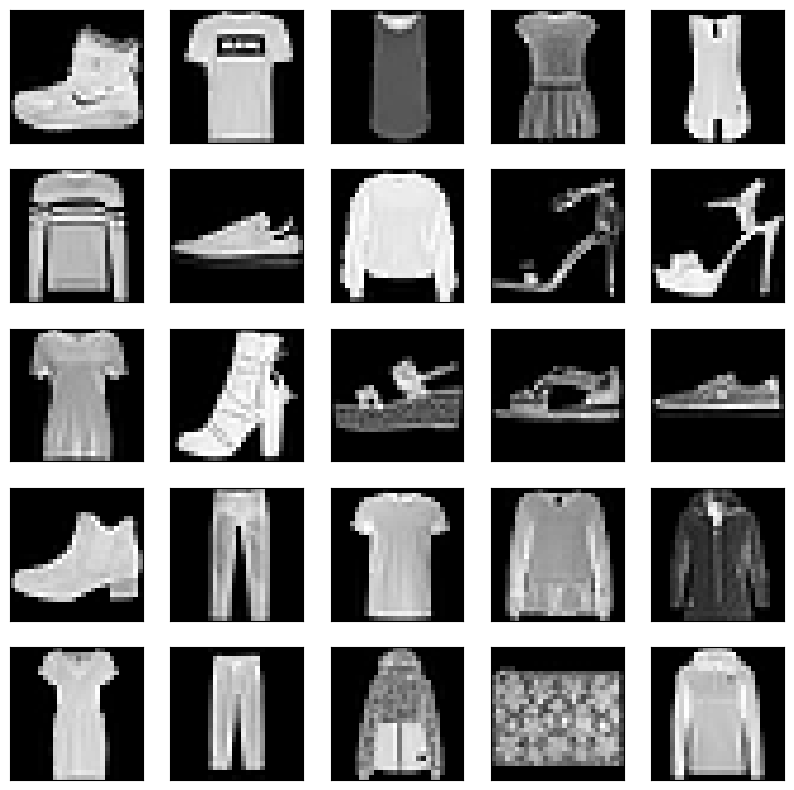

In [6]:
import matplotlib.pyplot as plt

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')

Visualize 5 random images from the training set with their labels.

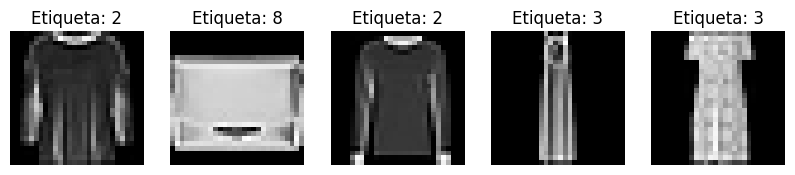

In [5]:
import numpy as np

random_indices = np.random.choice(train_images.shape[0], 5, replace=False)

plt.figure(figsize=(10, 10))

for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f"Etiqueta: {train_labels[index]}")
    plt.axis('off')

plt.show()

Reshape the data to include a channel dimension and confirm the new shape.

In [33]:
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

from tensorflow import keras
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [40]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Compile your model with an appropriate optimizer, loss function, and metric.

In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [42]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.7119 - loss: 1.0293 - val_accuracy: 0.8458 - val_loss: 0.5670
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.8511 - loss: 0.5572 - val_accuracy: 0.8664 - val_loss: 0.4895
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.8698 - loss: 0.4940 - val_accuracy: 0.8823 - val_loss: 0.4569
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.8772 - loss: 0.4635 - val_accuracy: 0.8882 - val_loss: 0.4255
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8843 - loss: 0.4375 - val_accuracy: 0.8763 - val_loss: 0.4425
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 48ms/step - accuracy: 0.8878 - loss: 0.4241 - val_accuracy: 0.8904 - val_loss: 0.4060
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.8920 - loss: 0.4099 - val_accuracy: 0.8929 - val_loss: 0.3989
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.8963 -

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8958 - loss: 0.3926
Test accuracy: 0.895799994468689


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


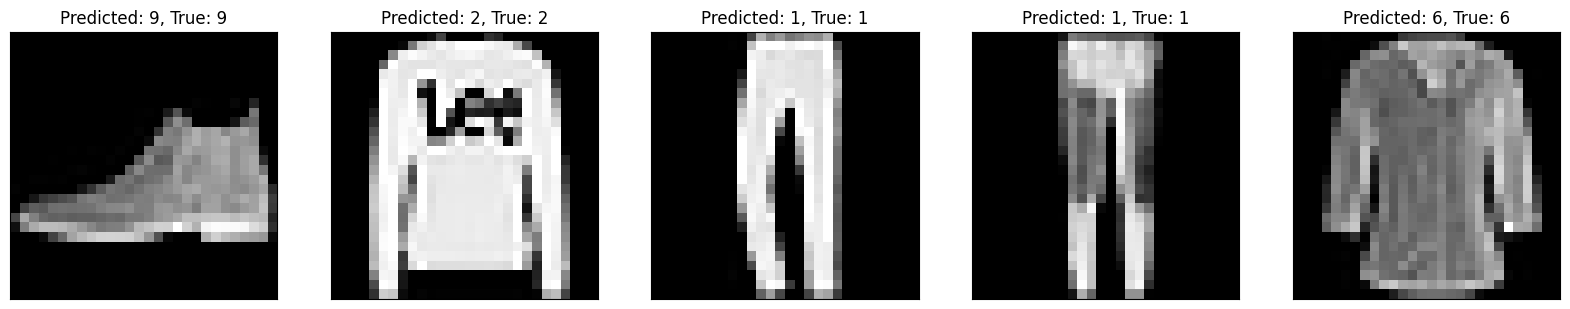

In [46]:
predictions = model.predict(test_images)

plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.show()

Construct a confusion matrix to visualize how well your model performed across different classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


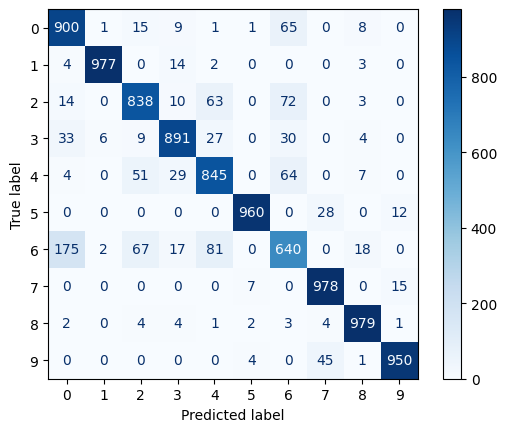

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()